In [55]:
from __future__ import print_function
import numpy as np
import cv2
import os.path
import sys
from PIL import Image, ImageDraw, ImageFont
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [56]:
#coding: utf-8
'''
Kizu Recog 2017.1.13
 
'''

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import model_from_json
import PIL.ImageOps    
from keras import backend as K 


np.random.seed(1337)  # for reproducibility



In [57]:
size = (56, 56)
# argvs = sys.argv
# argc = len(argvs) 
# print(argvs)
# print(argc)

# input image name
# fileName=argvs[1]

winW=56 #sliding window width
winH=56 #sliding window height

f_log = './log'
f_model = './model'
model_filename = 'cnn_model.json'
weights_filename = 'cnn_model_weights.hdf5'
batch_size = 55

# 1. load model
json_string = open(os.path.join(f_model, model_filename)).read()
model = model_from_json(json_string)
sgd = SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)

model.load_weights(os.path.join(f_model,weights_filename))

In [58]:
# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [59]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x11ce2dc88>,
 'activation_2': <keras.layers.core.Activation at 0x1207296d8>,
 'activation_3': <keras.layers.core.Activation at 0x11cf6dcf8>,
 'activation_4': <keras.layers.core.Activation at 0x1205af080>,
 'activation_5': <keras.layers.core.Activation at 0x12051a0b8>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x120729f28>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x12071a9b0>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x11d07feb8>,
 'dense_1': <keras.layers.core.Dense at 0x1207203c8>,
 'dense_2': <keras.layers.core.Dense at 0x1205af5c0>,
 'dropout_1': <keras.layers.core.Dropout at 0x1205af978>,
 'flatten_1': <keras.layers.core.Flatten at 0x11d036278>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x1205be668>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x120726208>,
 'max_pooling2d_3': <keras.layers.pooling.MaxPooling2D at 0x12077c400>}

In [60]:
filter_index = 3
layer_output = layer_dict['conv2d_3'].output
layer_output.

<tf.Tensor 'conv2d_3_4/BiasAdd:0' shape=(?, 10, 10, 64) dtype=float32>

In [35]:
loss = K.mean(layer_output[:, :, :, filter_index])
print("loss=")
print(loss)

loss=
Tensor("Mean_3:0", shape=(), dtype=float32)


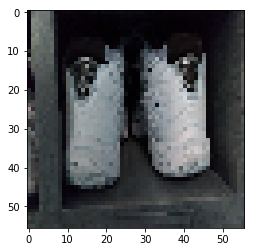

In [36]:
filename="test2.jpg"
input_img=cv2.imread(filename)
input_img=cv2.resize(input_img, (56,56))
plt.imshow(input_img,'gray')
plt.show()

In [37]:
# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)

In [38]:
print(grads)

[None]


In [23]:
# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

ValueError: None values not supported.

In [ ]:
# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

In [39]:

#choose input, output layers for visualation
get_3rd_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[10].output])

#2 First Conv
#3 Batch Normalization
#4 Activation
#iterate = K.function([input_img, K.learning_phase()], [loss, grads])


a= [imNP.reshape(-1,imNP.shape[0],imNP.shape[1],imNP.shape[2]), 0]

layer_output = get_3rd_layer_output(a)[0]




print('The second dimension tells us how many convolutions do we have: %s (%d convolutions)' % (str(layer_output.shape),layer_output.shape[1]))
print(layer_output.shape[3])
numberConvolution=layer_output.shape[3]
b= int(numberConvolution/8)
a= int(numberConvolution/b)

i=1
fig = plt.figure() 
fig.canvas.set_window_title('My Window Title') 

for onePic in np.rollaxis(layer_output, 3):
	onePic = onePic.reshape(layer_output.shape[1],layer_output.shape[2])
	plt.subplot(a,b, i)
	plt.imshow(onePic,'gray')
	plt.xticks([]),plt.yticks([])
	i=i+1

plt.show()

cv2.waitKey(1)

NameError: name 'imNP' is not defined

# From Seegauge script
Visualizing weight of folder

In [40]:
from __future__ import print_function
import tensorflow as tf
import h5py
import cv2
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.layers import Convolution2D, MaxPooling2D
from keras import backend as K
import numpy as np
from scipy.misc import imsave
from keras.utils.vis_utils import plot_model
from keras.models import model_from_json
import os.path
from matplotlib import pyplot as plt
%matplotlib inline


In [41]:
f_model = './model'
model_filename = 'cnn_model.json'
weights_filename = 'cnn_model_weights.hdf5'
#load model


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 25, 25, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
__________

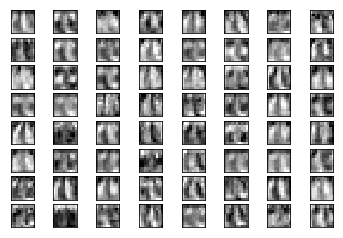

-1

In [42]:
K._LEARNING_PHASE = tf.constant(0) # test mode
json_string = open(os.path.join(f_model, model_filename)).read()
model = model_from_json(json_string)
sgd = SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)
#set compiler
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])
model.load_weights(os.path.join(f_model,weights_filename))


fileName= "test2.jpg"
#prepare input picture
im = cv2.imread(fileName)
if im is None:
	print("no image file selected")
im=cv2.resize(im, (56,56))
imNP = np.asarray(im)
#choose input, output layers for visualation
model.summary()
get_3rd_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[6].output])
K.gradients
a= [imNP.reshape(-1,imNP.shape[0],imNP.shape[1],imNP.shape[2]), 0]

layer_output = get_3rd_layer_output(a)[0]

print('The second dimension tells us how many convolutions do we have: %s (%d convolutions)' % (str(layer_output.shape),layer_output.shape[1]))
print(layer_output.shape[3])
numberConvolution=layer_output.shape[3]
b= int(numberConvolution/8)
a= int(numberConvolution/b)

i=1
fig = plt.figure() 
fig.canvas.set_window_title('My Window Title') 

for onePic in np.rollaxis(layer_output, 3):
	onePic = onePic.reshape(layer_output.shape[1],layer_output.shape[2])
	plt.subplot(a,b, i)
	plt.imshow(onePic,'gray')
	plt.xticks([]),plt.yticks([])
	i=i+1

plt.show()

cv2.waitKey(1)


In [68]:
conv_2_weight = model.layers[13].get_weights()

In [143]:
# 13 layer weight
arr = conv_2_weight[0]
max5_idx = np.argsort((-arr), axis=0, kind='quicksort', order=None)[:40]
max5_idx
arr[max5_idx].sum()
# find max 5
# ind = np.argpartition(, -4)[-4:]

4.5146856

In [148]:
# 12 layer output
get_13rd_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[12].output])

a= [imNP.reshape(-1,imNP.shape[0],imNP.shape[1],imNP.shape[2]), 0]

layer_output = get_13rd_layer_output(a)[0]
layer_output

array([[   0.        ,  623.21795654,  148.2827301 ,    0.        ,
         265.76358032,   57.17998123,   89.61230469,    0.        ,
           0.        ,   26.2183876 ,  150.67147827,    0.        ,
           0.        ,  220.4299469 ,    0.        ,    0.        ,
           0.        ,  152.84248352,    0.        ,    0.        ,
           0.        ,    0.        ,  426.28060913,    0.        ,
           0.        ,    0.        ,    0.        ,  326.47424316,
         146.33976746,  201.68952942,    0.        ,    0.        ,
           4.7931571 ,  259.75860596,    0.        ,    0.        ,
          70.68435669,  106.12663269,    0.        ,    0.        ,
         153.12052917,    0.        ,    0.        ,    0.        ,
         346.2182312 ,    0.        ,    0.        ,   45.25072861,
         324.47598267,    0.        ,   93.36549377,  130.39871216,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  347.26495361,    0.     

In [161]:
# 13 layer output
# (conv_2_weight * layer_output).shape
conv_2_weight.shape

SyntaxError: invalid syntax (<ipython-input-161-a54f202e7474>, line 5)

The second dimension tells us how many convolutions do we have: (1, 10, 10, 64) (10 convolutions)
64


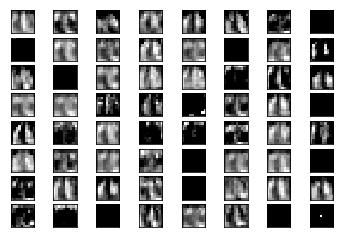

-1

In [43]:
get_3rd_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[7].output])

a= [imNP.reshape(-1,imNP.shape[0],imNP.shape[1],imNP.shape[2]), 0]

layer_output = get_3rd_layer_output(a)[0]

print('The second dimension tells us how many convolutions do we have: %s (%d convolutions)' % (str(layer_output.shape),layer_output.shape[1]))
print(layer_output.shape[3])
numberConvolution=layer_output.shape[3]
b= int(numberConvolution/8)
a= int(numberConvolution/b)

i=1
fig = plt.figure() 
fig.canvas.set_window_title('My Window Title') 

for onePic in np.rollaxis(layer_output, 3):
	onePic = onePic.reshape(layer_output.shape[1],layer_output.shape[2])
	plt.subplot(a,b, i)
	plt.imshow(onePic,'gray')
	plt.xticks([]),plt.yticks([])
	i=i+1

plt.show()

cv2.waitKey(1)


In [54]:
get_3rd_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[9].output])

a= [imNP.reshape(-1,imNP.shape[0],imNP.shape[1],imNP.shape[2]), 0]

layer_output = get_3rd_layer_output(a)[0]



print('The second dimension tells us how many convolutions do we have: %s (%d convolutions)' % (str(layer_output.shape),layer_output.shape[1]))
# print(layer_output.shapfe[3])
# numberConvolution=layer_output.shape[3]
# b= int(numberConvolution/8)
# a= int(numberConvolution/b)

# i=1
# fig = plt.figure() 
# fig.canvas.set_window_title('My Window Title') 
print(layer_output)

# for onePic in np.rollaxis(layer_output, 3):
#     print(np.mean(onePic))

    
# 	onePic = onePic.reshape(layer_output.shape[1],layer_output.shape[2])
# 	plt.subplot(a,b, i)
# 	plt.imshow(onePic,'gray')
# 	plt.xticks([]),plt.yticks([])
# 	i=i+1

# plt.show()

# cv2.waitKey(1)         

The second dimension tells us how many convolutions do we have: (1, 1600) (1600 convolutions)
[[ 55.68763351  52.35593796   0.         ...,  53.3817482    0.           0.        ]]


The second dimension tells us how many convolutions do we have: (1, 25, 25, 32) (25 convolutions)
32


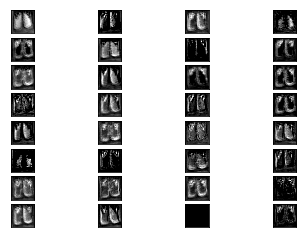

-1

In [7]:
get_3rd_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[4].output])

a= [imNP.reshape(-1,imNP.shape[0],imNP.shape[1],imNP.shape[2]), 0]

layer_output = get_3rd_layer_output(a)[0]

print('The second dimension tells us how many convolutions do we have: %s (%d convolutions)' % (str(layer_output.shape),layer_output.shape[1]))
print(layer_output.shape[3])
numberConvolution=layer_output.shape[3]
b= int(numberConvolution/8)
a= int(numberConvolution/b)

i=1
fig = plt.figure() 
fig.canvas.set_window_title('My Window Title') 

for onePic in np.rollaxis(layer_output, 3):
	onePic = onePic.reshape(layer_output.shape[1],layer_output.shape[2])
	plt.subplot(a,b, i)
	plt.imshow(onePic,'gray')
	plt.xticks([]),plt.yticks([])
	i=i+1

plt.show()

cv2.waitKey(1)

The second dimension tells us how many convolutions do we have: (1, 25, 25, 32) (25 convolutions)
32


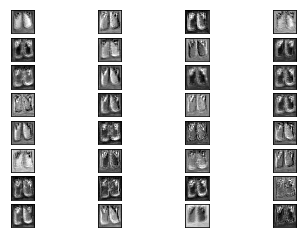

-1

In [8]:
get_3rd_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[3].output])

a= [imNP.reshape(-1,imNP.shape[0],imNP.shape[1],imNP.shape[2]), 0]

layer_output = get_3rd_layer_output(a)[0]

print('The second dimension tells us how many convolutions do we have: %s (%d convolutions)' % (str(layer_output.shape),layer_output.shape[1]))
print(layer_output.shape[3])
numberConvolution=layer_output.shape[3]
b= int(numberConvolution/8)
a= int(numberConvolution/b)

i=1
fig = plt.figure() 
fig.canvas.set_window_title('My Window Title') 

for onePic in np.rollaxis(layer_output, 3):
	onePic = onePic.reshape(layer_output.shape[1],layer_output.shape[2])
	plt.subplot(a,b, i)
	plt.imshow(onePic,'gray')
	plt.xticks([]),plt.yticks([])
	i=i+1

plt.show()

cv2.waitKey(1)

The second dimension tells us how many convolutions do we have: (1, 27, 27, 32) (27 convolutions)
32


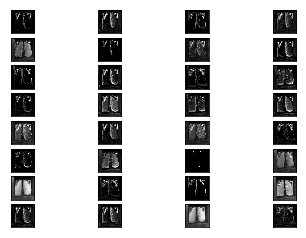

-1

In [9]:
get_3rd_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[2].output])

a= [imNP.reshape(-1,imNP.shape[0],imNP.shape[1],imNP.shape[2]), 0]

layer_output = get_3rd_layer_output(a)[0]

print('The second dimension tells us how many convolutions do we have: %s (%d convolutions)' % (str(layer_output.shape),layer_output.shape[1]))
print(layer_output.shape[3])
numberConvolution=layer_output.shape[3]
b= int(numberConvolution/8)
a= int(numberConvolution/b)

i=1
fig = plt.figure() 
fig.canvas.set_window_title('My Window Title') 

for onePic in np.rollaxis(layer_output, 3):
	onePic = onePic.reshape(layer_output.shape[1],layer_output.shape[2])
	plt.subplot(a,b, i)
	plt.imshow(onePic,'gray')
	plt.xticks([]),plt.yticks([])
	i=i+1

plt.show()

cv2.waitKey(1)

The second dimension tells us how many convolutions do we have: (1, 54, 54, 32) (54 convolutions)
32


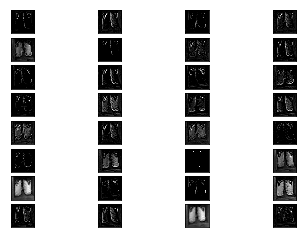

-1

In [10]:
get_3rd_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[1].output])

a= [imNP.reshape(-1,imNP.shape[0],imNP.shape[1],imNP.shape[2]), 0]

layer_output = get_3rd_layer_output(a)[0]

print('The second dimension tells us how many convolutions do we have: %s (%d convolutions)' % (str(layer_output.shape),layer_output.shape[1]))
print(layer_output.shape[3])
numberConvolution=layer_output.shape[3]
b= int(numberConvolution/8)
a= int(numberConvolution/b)

i=1
fig = plt.figure() 
fig.canvas.set_window_title('My Window Title') 

for onePic in np.rollaxis(layer_output, 3):
	onePic = onePic.reshape(layer_output.shape[1],layer_output.shape[2])
	plt.subplot(a,b, i)
	plt.imshow(onePic,'gray')
	plt.xticks([]),plt.yticks([])
	i=i+1

plt.show()

cv2.waitKey(1)

The second dimension tells us how many convolutions do we have: (1, 54, 54, 32) (54 convolutions)
32


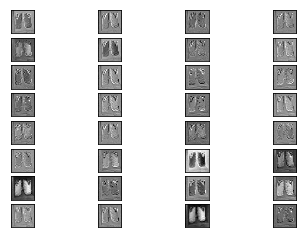

-1

In [11]:
get_3rd_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[0].output])

a= [imNP.reshape(-1,imNP.shape[0],imNP.shape[1],imNP.shape[2]), 0]

layer_output = get_3rd_layer_output(a)[0]

print('The second dimension tells us how many convolutions do we have: %s (%d convolutions)' % (str(layer_output.shape),layer_output.shape[1]))
print(layer_output.shape[3])
numberConvolution=layer_output.shape[3]
b= int(numberConvolution/8)
a= int(numberConvolution/b)

i=1
fig = plt.figure() 
fig.canvas.set_window_title('My Window Title') 

for onePic in np.rollaxis(layer_output, 3):
	onePic = onePic.reshape(layer_output.shape[1],layer_output.shape[2])
	plt.subplot(a,b, i)
	plt.imshow(onePic,'gray')
	plt.xticks([]),plt.yticks([])
	i=i+1

plt.show()

cv2.waitKey(1)

# Visualizing Most Active Filter

In [ ]:

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])
